# Feature Engineering for Train Dataset

In the previous analysis step we realized that the current train dataset does not have a good amount of variables/features that are strongly related to the
prediction of obesity risk, that fact leads us to a feature engineering process where the target is to build new features that could give more reelevant 
information for our final prediction model. Now here are the list of strategies that will be permformed along this notebook:

1. Create new BMI (Boddy Mass Index) feature based on a person height and weight. Idea based on a short paper overview.
2. Normalize all the features using a standar scaler.
3. Build new features using PCA (Principal Component Analysis).

## Required Imports

In [1]:
import sys
sys.path.append('../../')

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from src.processing.features_building import build_bmi_feature, standarize_data, build_pca_components

In [3]:
warnings.filterwarnings("ignore")

## Constants Defintion

In [4]:
DATA_PATH = '../../data/'
INTERMID_PATH = DATA_PATH + 'intermid/'
PROCESSED_PATH = DATA_PATH + 'processed/'
RESULTS_PATH = '../../results/'

## Data Loading

In [5]:
train_df = pd.read_csv(INTERMID_PATH + 'train.csv')

## Feature Building

First of all we will remove the target column ``NObeyesdad`` and it will be added at the end of the processing.

In [6]:
target_column = train_df.pop('NObeyesdad')

In [7]:
train_df.pop('id')

0            0
1            1
2            2
3            3
4            4
         ...  
20753    20753
20754    20754
20755    20755
20756    20756
20757    20757
Name: id, Length: 20758, dtype: int64

### BMI

After we will create the BMI feature based on the weight and height of every person.

In [8]:
build_bmi_feature(train_df)

## Standarization and PCA

As many features are not even related to our target variable in a +-0.1, those features will not be taken on mind for the leaving part of the process.

In [9]:
uncorrelated_features = ['Gender', 'NCP', 'SMOKE', 'MTRANS']
train_df.drop(uncorrelated_features, axis=1, inplace=True)

In [10]:
train_df.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'BMI'],
      dtype='object')

In [11]:
standarazied_features = standarize_data(train_df, train_df.columns)
pca_components, pca = build_pca_components(standarazied_features, 2)

In [13]:
train_df = pd.DataFrame(standarazied_features, columns=train_df.columns)

for component in pca_components.columns:
    train_df[component] = pca_components[component]

## Correlation Analysis

After this process of adding 3 new features we will plot one more time the correlation of all the features with our target variable to define the most importan features that will be used in the modeling stage.

In [14]:
train_df.insert(len(train_df.columns), 'NObeyesdad', target_column)

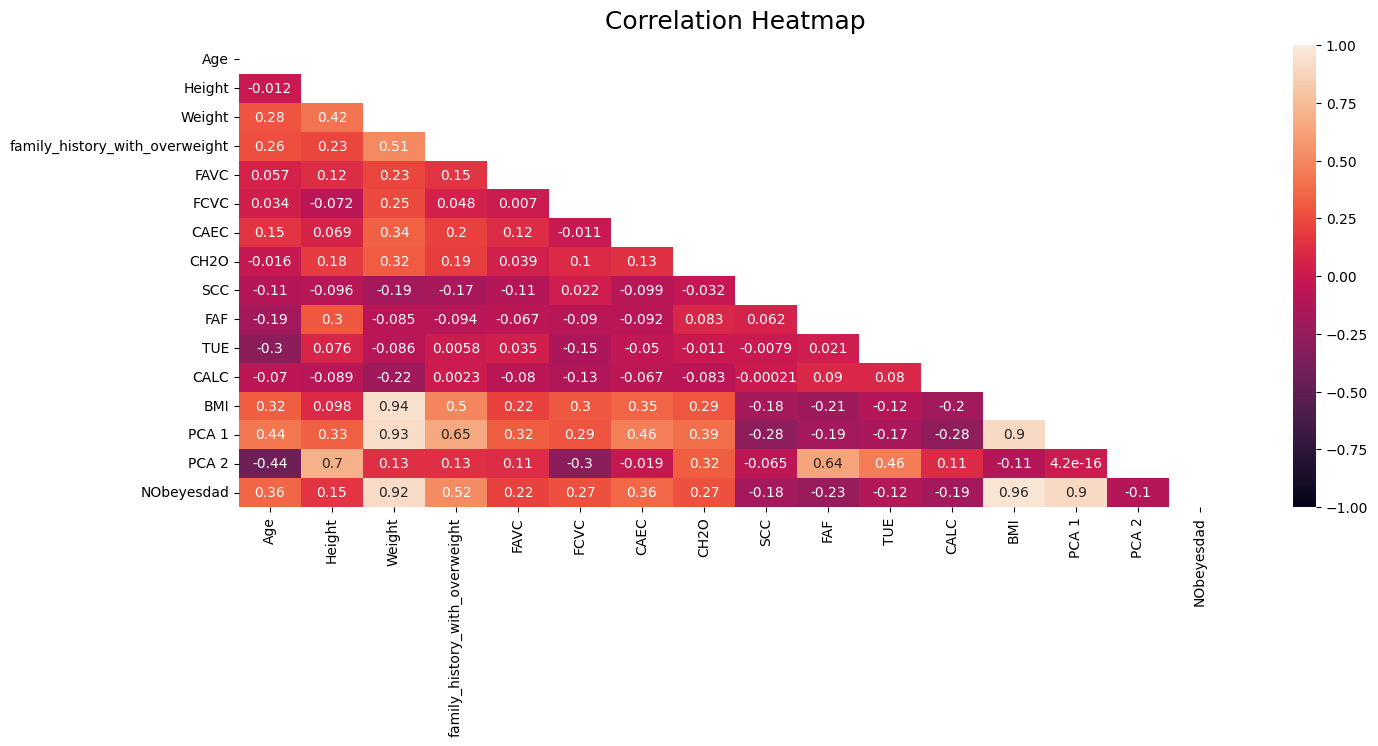

In [15]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(train_df[train_df.columns].corr(), dtype=np.bool))
heatmap = sns.heatmap(train_df[train_df.columns].corr(), vmin=-1, vmax=1, annot=True, mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Save Data
Once we have completed the processing the data is ready to be used in the training process.

In [16]:
train_df.to_csv(PROCESSED_PATH + 'train.csv', index=False)

## Save PCA

The PCA instance used will be useful at the evaluation stage so it will be saved in the results folder

In [17]:
with open(RESULTS_PATH + '/red_dimension/' + 'pca.pkl', 'wb') as file:
    pickle.dump(pca, file)
    file.close()